In [21]:
# Auditory masking sound generation (Kop et al., eLife 2023)

# This script generates:
# - 1 kHz square-wave carrier
# - Pulsed at 1000 Hz PRF
# - Pulse width = 0.3 ms
# - Pulse train duration = 500 ms (changeable)
# - White noise added at SNR = 14:1
# - Output saved as WAV file



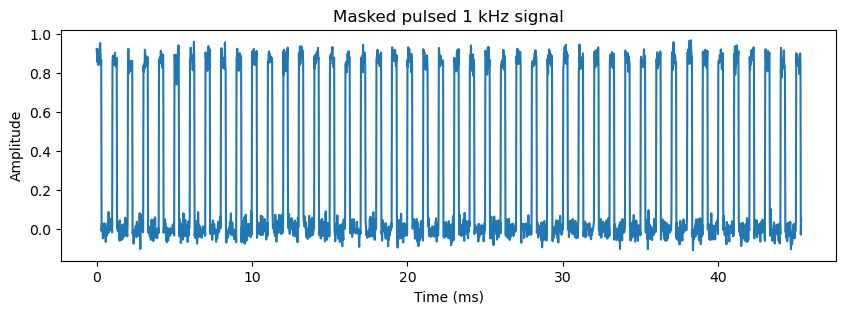

In [36]:
import numpy as np
from scipy.signal import square
from scipy.io.wavfile import write
import matplotlib.pyplot as plt

# parameters matched to Kop et al. (eLife)
fs = 44100
carrier_freq = 1000          # 1Khz square wave
PRF = 1000                   # Pulse repetition frequency
pulse_width = 0.0003         # 0.3 ms pulse duration
duration = 0.5               # 500 ms (use 0.1 for 100 ms duration)
SNR = 14                     # signal:noise

# time vector
t = np.arange(0, duration, 1/fs)

# 1 kHz square-wave carrier
carrier = square(2 * np.pi * carrier_freq * t)

# pulse gating (1 ms period, 0.3 ms on)
gate = (np.mod(t, 1/PRF) < pulse_width)

# pulsed signal
signal = carrier * gate

# white noise
noise = np.random.randn(len(signal))

# scale noise to SNR = 14:1
signal_rms = np.sqrt(np.mean(signal**2))
noise_rms = np.sqrt(np.mean(noise**2))
noise *= signal_rms / (SNR * noise_rms)

# combine and normalize
masking_sound = signal + noise
masking_sound /= np.max(np.abs(masking_sound))

# quick visual check
plt.figure(figsize=(10, 3))
plt.plot(t[:2000]*1000, masking_sound[:2000])
plt.xlabel("Time (ms)")
plt.ylabel("Amplitude")
plt.title("Masked pulsed 1 kHz signal")
plt.show()




In [38]:
# save wav
write(
    "tus_mask_1kHz_PRF1000_PW3ms_SNR14_500ms_.wav",
    fs,
    masking_sound.astype(np.float32)
)